<a href="https://colab.research.google.com/github/erolafr/StreetViewSentinel/blob/main/AnalysisTrueDetections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Street View Sentinel - Image Analysis

This notebook analyzes image metadata and object detection results from the Street View Sentinel project to understand the spatial and temporal distribution of detected plants, specifically Opuntia and Agave.

## Resources
[Street View Sentinel Website](https://erolafenollosa.weebly.com/street-view-sentinel.html)

## 1. Data Loading

We will load two datasets containing information about Google Street View images:
1.  `all_images_metadata_with_class_counts.csv`: This dataset, generated from object detection analysis, includes metadata and counts of detected Agave and Opuntia instances for a subset of images.
2.  `GSVImages.csv`: This dataset contains comprehensive metadata for a larger collection of Google Street View images.

Our goal is to merge these datasets to combine the detailed image metadata with the plant detection results.

In [51]:
import pandas as pd

# Load the Roboflow dataset containing plant detection counts
try:
    roboflow_df = pd.read_csv('all_images_metadata_with_class_counts.csv')
    print("Successfully loaded roboflow_df. Head:")
    display(roboflow_df.head())
except FileNotFoundError:
    print("Error: 'all_images_metadata_with_class_counts.csv' not found. Please upload the file.")
    roboflow_df = None # Set to None if file not found

# Load the comprehensive images dataset
try:
    complete_images_df = pd.read_csv('GSVImages.csv')
    print("\nSuccessfully loaded complete_images_df. Head:")
    display(complete_images_df.head())
except FileNotFoundError:
    print("Error: 'GSVImages.csv' not found. Please upload the file.")
    complete_images_df = None # Set to None if file not found

Successfully loaded roboflow_df. Head:


,split,image_id,file_name,width,height,agave_count,opuntia_count
0,train,0,CIHM0ogKEICAgIDq5e7iUg_20150412_596_jpg,2508,1254,11,0
1,train,1,h30sp-vVpth4NnEfBst37A_20091200_1055_jpg,13312,6656,0,0
2,train,2,CIHM0ogKEICAgICEvfnjPQ_20170926_1966_jpg,5376,2688,0,0
3,train,3,CIHM0ogKEICAgICm8bOLCA_20220101_1295_jpg,11264,5632,0,0
4,train,4,CIHM0ogKEICAgICEkfGLFw_20150705_1842_jpg,8704,4352,1,0



Successfully loaded complete_images_df. Head:


,Unnamed: 0,finalSaveLocation,filename,fileSizeMb,fileType,resolution_width,resolution_height,zoomLevel,panoId,lat,lng,date_year,date_month,date_day,elevation,copyright,rotation,dateDownloadedTimestamp,file_name
0,1,D:\SVSImages\--_7b81ehT7myqfFatGTtw_20101100_3...,--_7b81ehT7myqfFatGTtw_20101100_3367.jpg,7.830621,jpg,13312,6656,5,--_7b81ehT7myqfFatGTtw,36.933417,15.095595,2010,11,NaN,310.470398,Google,247.476196,1754451765949,--_7b81ehT7myqfFatGTtw_20101100_3367.metadata....
1,2,D:\SVSImages\--5GYN6dcLLpBQNcEs2woQ_20250600_2...,--5GYN6dcLLpBQNcEs2woQ_20250600_2032.jpg,13.635805,jpg,16384,8192,5,--5GYN6dcLLpBQNcEs2woQ,38.232624,15.474827,2025,6,NaN,304.475769,Google,105.294418,1754420101547,--5GYN6dcLLpBQNcEs2woQ_20250600_2032.metadata....
2,3,D:\SVSImages\-_02y8qbzeGvRnE5rJAbmg_20101100_3...,-_02y8qbzeGvRnE5rJAbmg_20101100_3366.jpg,6.863889,jpg,13312,6656,5,-_02y8qbzeGvRnE5rJAbmg,36.933356,15.095751,2010,11,NaN,309.012115,Google,50.565567,1754451743869,-_02y8qbzeGvRnE5rJAbmg_20101100_3366.metadata....
3,4,D:\SVSImages\-1ltsr9j_I4b2gpzf5J8xQ_20240500_3...,-1ltsr9j_I4b2gpzf5J8xQ_20240500_3279.jpg,13.093288,jpg,16384,8192,5,-1ltsr9j_I4b2gpzf5J8xQ,37.017908,15.091106,2024,5,NaN,340.842590,Google,61.779541,1754449405777,-1ltsr9j_I4b2gpzf5J8xQ_20240500_3279.metadata....
4,5,E:\SVSImages\-2ushi5qEpanWTTc_kZp-A_20240500_3...,-2ushi5qEpanWTTc_kZp-A_20240500_3735.jpg,9.790768,jpg,16384,8192,5,-2ushi5qEpanWTTc_kZp-A,37.080976,15.163013,2024,5,NaN,103.933456,Google,162.136316,1755458509289,-2ushi5qEpanWTTc_kZp-A_20240500_3735.metadata....


## 2. Data Cleaning: Filename Matching

To accurately merge the two dataframes, we need to ensure the filenames used as the merge key have a consistent format. The `roboflow_df` uses filenames with `_jpg` or `_png` suffixes, while `complete_images_df` uses `.jpg` or `.png`. We will standardize the filenames in `complete_images_df` to match the format in `roboflow_df` by replacing the dots with underscores before the file extension.

In [52]:
# Proceed with cleaning and merging only if both dataframes were loaded successfully
if roboflow_df is not None and complete_images_df is not None:
    # Replace .jpg with _jpg and .png with _png in complete_images_df['filename']
    complete_images_df['filename'] = complete_images_df['filename'].str.replace('.jpg', '_jpg', regex=False).str.replace('.png', '_png', regex=False)

    print("Head of complete_images_df after cleaning filenames:")
    display(complete_images_df.head())
else:
    print("Skipping filename cleaning as one or both dataframes failed to load.")

Head of complete_images_df after cleaning filenames:


,Unnamed: 0,finalSaveLocation,filename,fileSizeMb,fileType,resolution_width,resolution_height,zoomLevel,panoId,lat,lng,date_year,date_month,date_day,elevation,copyright,rotation,dateDownloadedTimestamp,file_name
0,1,D:\SVSImages\--_7b81ehT7myqfFatGTtw_20101100_3...,--_7b81ehT7myqfFatGTtw_20101100_3367_jpg,7.830621,jpg,13312,6656,5,--_7b81ehT7myqfFatGTtw,36.933417,15.095595,2010,11,NaN,310.470398,Google,247.476196,1754451765949,--_7b81ehT7myqfFatGTtw_20101100_3367.metadata....
1,2,D:\SVSImages\--5GYN6dcLLpBQNcEs2woQ_20250600_2...,--5GYN6dcLLpBQNcEs2woQ_20250600_2032_jpg,13.635805,jpg,16384,8192,5,--5GYN6dcLLpBQNcEs2woQ,38.232624,15.474827,2025,6,NaN,304.475769,Google,105.294418,1754420101547,--5GYN6dcLLpBQNcEs2woQ_20250600_2032.metadata....
2,3,D:\SVSImages\-_02y8qbzeGvRnE5rJAbmg_20101100_3...,-_02y8qbzeGvRnE5rJAbmg_20101100_3366_jpg,6.863889,jpg,13312,6656,5,-_02y8qbzeGvRnE5rJAbmg,36.933356,15.095751,2010,11,NaN,309.012115,Google,50.565567,1754451743869,-_02y8qbzeGvRnE5rJAbmg_20101100_3366.metadata....
3,4,D:\SVSImages\-1ltsr9j_I4b2gpzf5J8xQ_20240500_3...,-1ltsr9j_I4b2gpzf5J8xQ_20240500_3279_jpg,13.093288,jpg,16384,8192,5,-1ltsr9j_I4b2gpzf5J8xQ,37.017908,15.091106,2024,5,NaN,340.842590,Google,61.779541,1754449405777,-1ltsr9j_I4b2gpzf5J8xQ_20240500_3279.metadata....
4,5,E:\SVSImages\-2ushi5qEpanWTTc_kZp-A_20240500_3...,-2ushi5qEpanWTTc_kZp-A_20240500_3735_jpg,9.790768,jpg,16384,8192,5,-2ushi5qEpanWTTc_kZp-A,37.080976,15.163013,2024,5,NaN,103.933456,Google,162.136316,1755458509289,-2ushi5qEpanWTTc_kZp-A_20240500_3735.metadata....


## 3. Merging DataFrames

We will perform a left merge operation. The `complete_images_df` will be the left dataframe, and `roboflow_df` will be the right dataframe. We will merge using the cleaned `filename` column from `complete_images_df` and the `file_name` column from `roboflow_df`. A left merge ensures that all images from `complete_images_df` are retained, and plant count information from `roboflow_df` is added where a matching filename is found. If no match is found, the columns from `roboflow_df` will have missing values (NaN).

In [53]:
# Proceed with merging only if both dataframes were loaded and cleaned
if roboflow_df is not None and complete_images_df is not None:
    # Perform the left merge
    merged_df = pd.merge(complete_images_df, roboflow_df, left_on='filename', right_on='file_name', how='left')

    print("Head of the merged dataframe:")
    display(merged_df.head())

    # Check the number of rows with missing plant counts after merge
    nan_counts = merged_df[['agave_count', 'opuntia_count']].isnull().any(axis=1).sum()
    print(f"\nNumber of rows in merged_df with NaN in agave_count or opuntia_count: {nan_counts}")

    # Display total number of rows and non-NaN rows
    total_rows = merged_df.shape[0]
    non_nan_counts = total_rows - nan_counts
    print(f"Total number of rows in merged_df: {total_rows}")
    print(f"Number of rows with non-NaN values in agave_count or opuntia_count (found in roboflow_df): {non_nan_counts}")

else:
    print("Skipping dataframe merge as one or both dataframes are not available.")
    merged_df = None # Ensure merged_df is None if merge was skipped

Head of the merged dataframe:


,Unnamed: 0,finalSaveLocation,filename,fileSizeMb,fileType,resolution_width,resolution_height,zoomLevel,panoId,lat,...,rotation,dateDownloadedTimestamp,file_name_x,split,image_id,file_name_y,width,height,agave_count,opuntia_count
0,1,D:\SVSImages\--_7b81ehT7myqfFatGTtw_20101100_3...,--_7b81ehT7myqfFatGTtw_20101100_3367_jpg,7.830621,jpg,13312,6656,5,--_7b81ehT7myqfFatGTtw,36.933417,...,247.476196,1754451765949,--_7b81ehT7myqfFatGTtw_20101100_3367.metadata....,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,D:\SVSImages\--5GYN6dcLLpBQNcEs2woQ_20250600_2...,--5GYN6dcLLpBQNcEs2woQ_20250600_2032_jpg,13.635805,jpg,16384,8192,5,--5GYN6dcLLpBQNcEs2woQ,38.232624,...,105.294418,1754420101547,--5GYN6dcLLpBQNcEs2woQ_20250600_2032.metadata....,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,D:\SVSImages\-_02y8qbzeGvRnE5rJAbmg_20101100_3...,-_02y8qbzeGvRnE5rJAbmg_20101100_3366_jpg,6.863889,jpg,13312,6656,5,-_02y8qbzeGvRnE5rJAbmg,36.933356,...,50.565567,1754451743869,-_02y8qbzeGvRnE5rJAbmg_20101100_3366.metadata....,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,D:\SVSImages\-1ltsr9j_I4b2gpzf5J8xQ_20240500_3...,-1ltsr9j_I4b2gpzf5J8xQ_20240500_3279_jpg,13.093288,jpg,16384,8192,5,-1ltsr9j_I4b2gpzf5J8xQ,37.017908,...,61.779541,1754449405777,-1ltsr9j_I4b2gpzf5J8xQ_20240500_3279.metadata....,train,737.0,-1ltsr9j_I4b2gpzf5J8xQ_20240500_3279_jpg,16384.0,8192.0,0.0,0.0
4,5,E:\SVSImages\-2ushi5qEpanWTTc_kZp-A_20240500_3...,-2ushi5qEpanWTTc_kZp-A_20240500_3735_jpg,9.790768,jpg,16384,8192,5,-2ushi5qEpanWTTc_kZp-A,37.080976,...,162.136316,1755458509289,-2ushi5qEpanWTTc_kZp-A_20240500_3735.metadata....,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Number of rows in merged_df with NaN in agave_count or opuntia_count: 14942
Total number of rows in merged_df: 16044
Number of rows with non-NaN values in agave_count or opuntia_count (found in roboflow_df): 1102


## 4. Verification of Merged Data

To confirm the result of the merge, we will check if there are any rows from the original `roboflow_df` that did not find a match in the `merged_df`. This helps us understand if any data from the Roboflow analysis was not successfully integrated.

In [54]:
# Proceed with verification only if merged_df was created
if merged_df is not None and roboflow_df is not None:
    # Check if there are rows from roboflow_df that are not in the merged_df
    missing_in_merged = roboflow_df[~roboflow_df['file_name'].isin(merged_df['filename'])]

    print(f"Number of rows from roboflow_df not in merged_df: {len(missing_in_merged)}")

    if len(missing_in_merged) > 0:
        print("\nSample of rows from roboflow_df not in merged_df:")
        display(missing_in_merged.head())
else:
    print("Skipping merge verification as merged_df or roboflow_df is not available.")

Number of rows from roboflow_df not in merged_df: 18

Sample of rows from roboflow_df not in merged_df:


,split,image_id,file_name,width,height,agave_count,opuntia_count
10,train,10,16_png,1918,918,0,81
113,train,113,1_png,1917,922,0,8
302,train,302,7_png,1920,916,0,18
322,train,322,6_png,1916,918,0,14
327,train,327,2_png,1918,916,0,11


## 5. Data Analysis: Plant Detection Summary

Now that the data is merged, we can perform some initial analysis on the plant detection results. We will calculate:
*   The total number of images with at least one detected Opuntia or Agave.
*   The total number of images from `roboflow_df` that were successfully merged (non-NaN plant counts).
*   The percentage and proportion of merged `roboflow_df` images relative to the total number of images in the merged dataset.
*   The total count of Opuntia and Agave instances in the merged `roboflow_df` images.
*   The percentage of merged `roboflow_df` images that contain at least one Opuntia or one Agave.

In [55]:
# Proceed with analysis only if merged_df was created
if merged_df is not None:
    # Count images with opuntia or agave (from the merged roboflow data)
    images_with_plants_count = merged_df[(merged_df['opuntia_count'] > 0) | (merged_df['agave_count'] > 0)].shape[0]

    print(f"Number of images with opuntia or agave: {images_with_plants_count}")

    # Calculations for total images, percentage, and proportion from roboflow_df
    total_images = merged_df.shape[0]
    non_nan_images = merged_df[['agave_count', 'opuntia_count']].notna().any(axis=1).sum()
    percentage_from_roboflow = (non_nan_images / total_images) * 100 if total_images > 0 else 0
    proportion_from_roboflow = non_nan_images / total_images if total_images > 0 else 0

    print(f"\nTotal number of images in the merged dataset: {total_images}")
    print(f"Number of images from roboflow_df (non-NaN): {non_nan_images}")
    print(f"Percentage of images from roboflow_df: {percentage_from_roboflow:.2f}%")
    print(f"Proportion of images from roboflow_df: {proportion_from_roboflow:.2f}")

    # Filter for rows that originated from roboflow_df (non-NaN plant counts)
    roboflow_merged_df = merged_df[merged_df[['agave_count', 'opuntia_count']].notna().any(axis=1)].copy()

    # Calculate total counts of opuntia and agave in the roboflow_df subset
    total_opuntia_count = roboflow_merged_df['opuntia_count'].sum()
    total_agave_count = roboflow_merged_df['agave_count'].sum()

    print(f"\nTotal count of opuntia in images from roboflow_df: {int(total_opuntia_count)}")
    print(f"Total count of agave in images from roboflow_df: {int(total_agave_count)}")

    # Calculate percentage of images from roboflow_df with at least one opuntia or agave
    images_with_opuntia_in_roboflow = roboflow_merged_df[roboflow_merged_df['opuntia_count'] > 0].shape[0]
    images_with_agave_in_roboflow = roboflow_merged_df[roboflow_merged_df['agave_count'] > 0].shape[0]

    percentage_images_with_opuntia = (images_with_opuntia_in_roboflow / non_nan_images) * 100 if non_nan_images > 0 else 0
    percentage_images_with_agave = (images_with_agave_in_roboflow / non_nan_images) * 100 if non_nan_images > 0 else 0

    print(f"\nPercentage of images from roboflow_df with at least one opuntia: {percentage_images_with_opuntia:.2f}%")
    print(f"Percentage of images from roboflow_df with at least one agave: {percentage_images_with_agave:.2f}%")
else:
    print("Skipping plant detection summary as merged_df is not available.")

Number of images with opuntia or agave: 285

Total number of images in the merged dataset: 16044
Number of images from roboflow_df (non-NaN): 1102
Percentage of images from roboflow_df: 6.87%
Proportion of images from roboflow_df: 0.07

Total count of opuntia in images from roboflow_df: 1891
Total count of agave in images from roboflow_df: 428

Percentage of images from roboflow_df with at least one opuntia: 21.87%
Percentage of images from roboflow_df with at least one agave: 7.53%


## 6. Spatial Distribution Analysis

We can visualize the spatial distribution of Opuntia detections using a map. We will plot each image from the `roboflow_df` that was included in the merge, with the marker size indicating the number of opuntias detected in that image. We will also differentiate between images with and without opuntia detections using color, and include a legend for both size and color.

In [66]:
# Proceed with spatial distribution analysis only if merged_df was created
if merged_df is not None:
    import folium
    import numpy as np
    import branca.colormap as cm

    # Calculate the mean latitude and longitude for centering the map using the original merged_df
    mean_lat = merged_df['lat'].mean()
    mean_lng = merged_df['lng'].mean()

    # Create a Folium map centered at the mean location
    m = folium.Map(location=[mean_lat, mean_lng], zoom_start=6)

    # Filter for rows that originated from roboflow_df (non-NaN plant counts)
    roboflow_merged_df = merged_df[merged_df['opuntia_count'].notna()].copy()

    # Define a color scale for opuntia counts (optional, but can improve visualization)
    # Using a linear colormap
    max_opuntia_count = roboflow_merged_df['opuntia_count'].max()
    colormap = cm.LinearColormap(['green', 'yellow', 'red'],
                                 vmin=0, vmax=max_opuntia_count)


    # Iterate through the filtered dataframe and add markers for images
    for index, row in roboflow_merged_df.iterrows():
        lat = row['lat']
        lng = row['lng']
        opuntia_count = row['opuntia_count']
        filename = row['filename']
        date_year = row['date_year']

        # Scale the marker size based on opuntia count
        # Adding 1 to the count makes markers for 0 counts visible and scales positively
        radius = (opuntia_count + 1) * 0.5

        # Determine marker color based on opuntia count or use a colormap
        # Using color based on count > 0 as before for clarity with zero counts
        color = 'seagreen' if opuntia_count > 0 else 'gray'

        # Add a circle marker to the map
        folium.CircleMarker(
            location=[lat, lng],
            radius=radius,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.6,
            tooltip=f"Filename: {filename}<br>Lat: {lat}, Lng: {lng}<br>Opuntia Count: {opuntia_count}<br>Year: {int(date_year) if not pd.isna(date_year) else 'N/A'}"
        ).add_to(m)

    # Add a legend for marker size (Opuntia Count)
    # We can create a simple visual representation of different sizes
    legend_html_size = '''
         <div style="position: fixed;
                     bottom: 50px; left: 50px; width: 200px; height: 120px;
                     border:2px solid grey; z-index:9999; font-size:14px;
                     background-color:white;opacity:0.9;">
           &nbsp; <b>Opuntia Count (Marker Size)</b> <br>
           &nbsp; <i style="background:seagreen; color:seagreen; margin-left:10px; font-size: 8px;">&#9679;</i> 0 <br>
           &nbsp; <i style="background:seagreen; color:seagreen; margin-left:10px; font-size: 12px;">&#9679;</i> 1-5 <br>
           &nbsp; <i style="background:seagreen; color:seagreen; margin-left:10px; font-size: 16px;">&#9679;</i> 6-10 <br>
           &nbsp; <i style="background:seagreen; color:seagreen; margin-left:10px; font-size: 20px;">&#9679;</i> 11+
         </div>
         '''
    m.get_root().html.add_child(folium.Element(legend_html_size))

    # Add a legend for marker color (Opuntia Detection)
    legend_html_color = '''
         <div style="position: fixed;
                     bottom: 50px; left: 260px; width: 180px; height: 90px;
                     border:2px solid grey; z-index:9999; font-size:14px;
                     background-color:white;opacity:0.9;">
           &nbsp; <b>Opuntia Detection</b> <br>
           &nbsp; <i style="background:seagreen; color:seagreen; margin-left:10px;">&#9679;</i> Opuntia Detected <br>
           &nbsp; <i style="background:gray; color:gray; margin-left:10px;">&#9679;</i> No Opuntia Detected
         </div>
         '''
    m.get_root().html.add_child(folium.Element(legend_html_color))


    # Display the map
    print("Map of Opuntia Detections by Image:")
    display(m)
else:
    print("Skipping spatial distribution analysis as merged_df is not available.")

Map of Opuntia Detections by Image:


## 7. Temporal Analysis

We can also analyze the temporal trends of Opuntia detections by examining the total counts, proportions, and average counts per analyzed image over the years.

### 7.1 Total Opuntia Count by Year

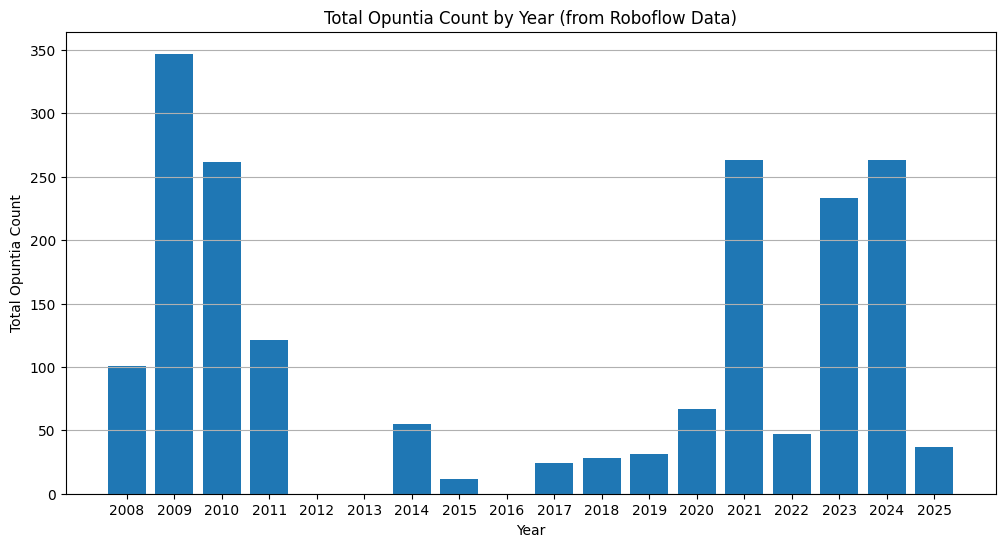

In [57]:
# Proceed with temporal analysis only if merged_df was created
if merged_df is not None:
    # Filter for rows that originated from roboflow_df (non-NaN plant counts)
    roboflow_merged_df_temporal = merged_df[merged_df[['agave_count', 'opuntia_count']].notna().any(axis=1)].copy()

    # Convert 'date_year' to integer, coercing errors
    roboflow_merged_df_temporal['date_year'] = pd.to_numeric(roboflow_merged_df_temporal['date_year'], errors='coerce')

    # Drop rows where date_year is NaN after coercion
    roboflow_merged_df_temporal.dropna(subset=['date_year'], inplace=True)

    # Convert 'date_year' to integer
    roboflow_merged_df_temporal['date_year'] = roboflow_merged_df_temporal['date_year'].astype(int)

    # Group by year and sum opuntia counts
    opuntia_by_year = roboflow_merged_df_temporal.groupby('date_year')['opuntia_count'].sum().reset_index()

    # Plot the opuntia counts by year
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 6))
    plt.bar(opuntia_by_year['date_year'], opuntia_by_year['opuntia_count'])
    plt.xlabel('Year')
    plt.ylabel('Total Opuntia Count')
    plt.title('Total Opuntia Count by Year (from Roboflow Data)')
    plt.xticks(opuntia_by_year['date_year'])
    plt.grid(axis='y')
    plt.show()
else:
    print("Skipping temporal analysis (Total Count) as merged_df is not available.")

### 7.2 Proportion of Images with Opuntia by Year

Opuntia proportion by year:


,date_year,total_analyzed_images,images_with_opuntia,proportion_with_opuntia
0,2008,55,12,0.218182
1,2009,222,43,0.193694
2,2010,167,42,0.251497
3,2011,33,5,0.151515
4,2012,2,0,0.000000
5,2013,4,0,0.000000
6,2014,16,5,0.312500
7,2015,16,1,0.062500
8,2016,31,0,0.000000
9,2017,67,3,0.044776


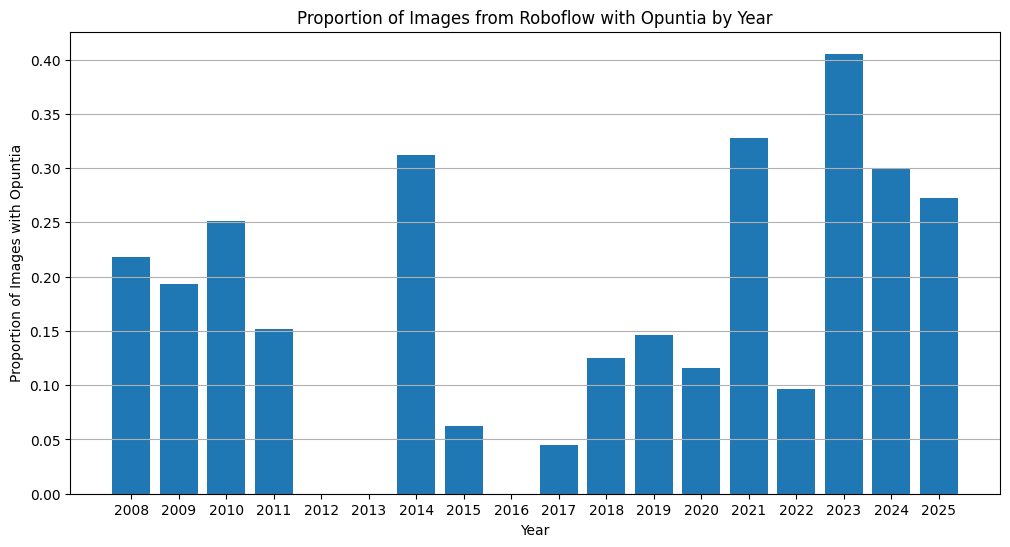

In [58]:
# Proceed with temporal analysis only if merged_df was created
if merged_df is not None:
    # Filter for rows that originated from roboflow_df (non-NaN plant counts)
    roboflow_merged_df_temporal = merged_df[merged_df[['agave_count', 'opuntia_count']].notna().any(axis=1)].copy()

    # Convert 'date_year' to integer, coercing errors
    roboflow_merged_df_temporal['date_year'] = pd.to_numeric(roboflow_merged_df_temporal['date_year'], errors='coerce')

    # Drop rows where date_year is NaN after coercion
    roboflow_merged_df_temporal.dropna(subset=['date_year'], inplace=True)

    # Convert 'date_year' to integer
    roboflow_merged_df_temporal['date_year'] = roboflow_merged_df_temporal['date_year'].astype(int)

    # Group by year and count the number of analyzed images and images with opuntia
    opuntia_proportion_by_year = roboflow_merged_df_temporal.groupby('date_year').agg(
        total_analyzed_images=('opuntia_count', 'count'),  # Count non-NaN opuntia_count for total analyzed images
        images_with_opuntia=('opuntia_count', lambda x: (x > 0).sum()) # Count images with opuntia > 0
    ).reset_index()

    # Calculate the proportion of images with opuntia
    opuntia_proportion_by_year['proportion_with_opuntia'] = opuntia_proportion_by_year['images_with_opuntia'] / opuntia_proportion_by_year['total_analyzed_images']

    print("Opuntia proportion by year:")
    display(opuntia_proportion_by_year)

    # Plot the proportion of images with opuntia by year
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 6))
    plt.bar(opuntia_proportion_by_year['date_year'], opuntia_proportion_by_year['proportion_with_opuntia'])
    plt.xlabel('Year')
    plt.ylabel('Proportion of Images with Opuntia')
    plt.title('Proportion of Images from Roboflow with Opuntia by Year')
    plt.xticks(opuntia_proportion_by_year['date_year'])
    plt.grid(axis='y')
    plt.show()
else:
    print("Skipping temporal analysis (Proportion) as merged_df is not available.")

### 7.3 Average Opuntia Count per Analyzed Image by Year

Average opuntia count per analyzed image by year:


,date_year,average_opuntia_count
0,2008,1.836364
1,2009,1.563063
2,2010,1.568862
3,2011,3.666667
4,2012,0.000000
5,2013,0.000000
6,2014,3.437500
7,2015,0.750000
8,2016,0.000000
9,2017,0.358209


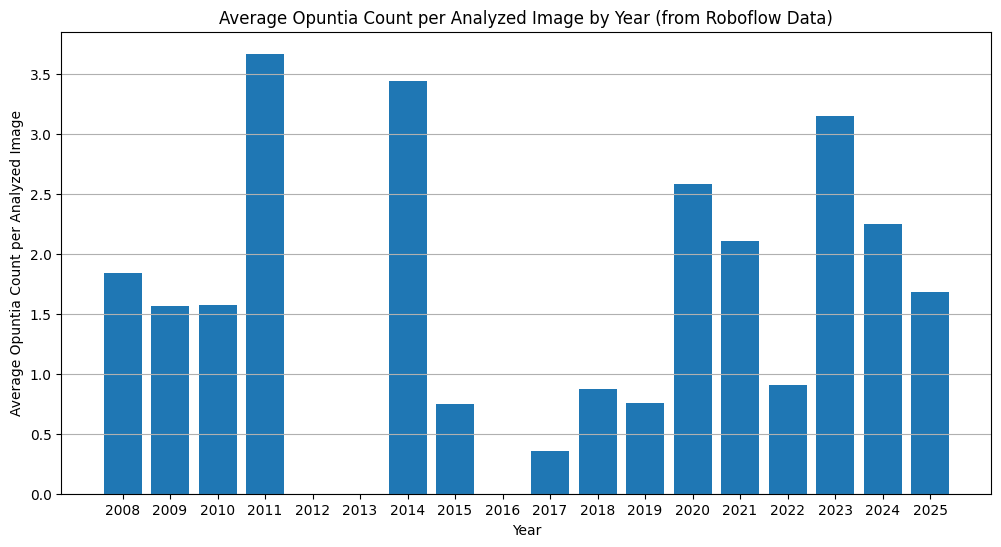

In [59]:
# Proceed with temporal analysis only if merged_df was created
if merged_df is not None:
    # Filter for rows that originated from roboflow_df (non-NaN plant counts)
    roboflow_merged_df_temporal = merged_df[merged_df[['agave_count', 'opuntia_count']].notna().any(axis=1)].copy()

    # Convert 'date_year' to integer, coercing errors
    roboflow_merged_df_temporal['date_year'] = pd.to_numeric(roboflow_merged_df_temporal['date_year'], errors='coerce')

    # Drop rows where date_year is NaN after coercion
    roboflow_merged_df_temporal.dropna(subset=['date_year'], inplace=True)

    # Convert 'date_year' to integer
    roboflow_merged_df_temporal['date_year'] = roboflow_merged_df_temporal['date_year'].astype(int)

    # Group by year and calculate the average opuntia count per image
    opuntia_average_by_year = roboflow_merged_df_temporal.groupby('date_year').agg(
        average_opuntia_count=('opuntia_count', 'mean') # Calculate the mean opuntia_count for analyzed images
    ).reset_index()

    print("Average opuntia count per analyzed image by year:")
    display(opuntia_average_by_year)

    # Plot the average opuntia count per analyzed image by year
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 6))
    plt.bar(opuntia_average_by_year['date_year'], opuntia_average_by_year['average_opuntia_count'])
    plt.xlabel('Year')
    plt.ylabel('Average Opuntia Count per Analyzed Image')
    plt.title('Average Opuntia Count per Analyzed Image by Year (from Roboflow Data)')
    plt.xticks(opuntia_average_by_year['date_year'])
    plt.grid(axis='y')
    plt.show()
else:
    print("Skipping temporal analysis (Average Count) as merged_df is not available.")

## 8. Spatial Distribution Analysis in Sicily (Heatmaps)

To investigate the spatial distribution of Opuntia detections and analyzed images specifically within Sicily, we will create heatmaps. This allows us to visualize areas with higher concentrations of detections and analyzed images, and to calculate a detection density.

### 8.1 Filter Data for Sicily

We will first filter the merged dataframe to include only images located within the approximate geographical boundaries of Sicily.

In [60]:
# Proceed with Sicily analysis only if merged_df was created
if merged_df is not None:
    # Define approximate geographical boundaries for Sicily
    # These values are approximate and can be refined
    sicily_lat_min = 36.5
    sicily_lat_max = 38.5
    sicily_lng_min = 12.5
    sicily_lng_max = 15.8

    # Filter the merged_df to include only locations within Sicily's boundaries
    sicily_df = merged_df[
        (merged_df['lat'] >= sicily_lat_min) & (merged_df['lat'] <= sicily_lat_max) &
        (merged_df['lng'] >= sicily_lng_min) & (merged_df['lng'] <= sicily_lng_max)
    ].copy()

    print("Head of sicily_df:")
    display(sicily_df.head())

    print("\nShape of sicily_df:")
    print(sicily_df.shape)
else:
    print("Skipping Sicily analysis as merged_df is not available.")
    sicily_df = None # Ensure sicily_df is None if filtering was skipped

Head of sicily_df:


,Unnamed: 0,finalSaveLocation,filename,fileSizeMb,fileType,resolution_width,resolution_height,zoomLevel,panoId,lat,...,rotation,dateDownloadedTimestamp,file_name_x,split,image_id,file_name_y,width,height,agave_count,opuntia_count
0,1,D:\SVSImages\--_7b81ehT7myqfFatGTtw_20101100_3...,--_7b81ehT7myqfFatGTtw_20101100_3367_jpg,7.830621,jpg,13312,6656,5,--_7b81ehT7myqfFatGTtw,36.933417,...,247.476196,1754451765949,--_7b81ehT7myqfFatGTtw_20101100_3367.metadata....,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,D:\SVSImages\--5GYN6dcLLpBQNcEs2woQ_20250600_2...,--5GYN6dcLLpBQNcEs2woQ_20250600_2032_jpg,13.635805,jpg,16384,8192,5,--5GYN6dcLLpBQNcEs2woQ,38.232624,...,105.294418,1754420101547,--5GYN6dcLLpBQNcEs2woQ_20250600_2032.metadata....,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,D:\SVSImages\-_02y8qbzeGvRnE5rJAbmg_20101100_3...,-_02y8qbzeGvRnE5rJAbmg_20101100_3366_jpg,6.863889,jpg,13312,6656,5,-_02y8qbzeGvRnE5rJAbmg,36.933356,...,50.565567,1754451743869,-_02y8qbzeGvRnE5rJAbmg_20101100_3366.metadata....,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,D:\SVSImages\-1ltsr9j_I4b2gpzf5J8xQ_20240500_3...,-1ltsr9j_I4b2gpzf5J8xQ_20240500_3279_jpg,13.093288,jpg,16384,8192,5,-1ltsr9j_I4b2gpzf5J8xQ,37.017908,...,61.779541,1754449405777,-1ltsr9j_I4b2gpzf5J8xQ_20240500_3279.metadata....,train,737.0,-1ltsr9j_I4b2gpzf5J8xQ_20240500_3279_jpg,16384.0,8192.0,0.0,0.0
4,5,E:\SVSImages\-2ushi5qEpanWTTc_kZp-A_20240500_3...,-2ushi5qEpanWTTc_kZp-A_20240500_3735_jpg,9.790768,jpg,16384,8192,5,-2ushi5qEpanWTTc_kZp-A,37.080976,...,162.136316,1755458509289,-2ushi5qEpanWTTc_kZp-A_20240500_3735.metadata....,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Shape of sicily_df:
(15895, 26)


### 8.2 Prepare Data for Heatmaps

For generating heatmaps, we need the data in a list format, typically `[latitude, longitude]` for a simple count heatmap, or `[latitude, longitude, weight]` for a weighted heatmap. We will prepare lists for both Opuntia detections (weighted by count) and analyzed images (weighted by 1).

In [61]:
# Proceed with heatmap data preparation only if sicily_df was created
if sicily_df is not None:
    # 1. Create a list of lists for Opuntia detections
    # Filter locations in sicily_df with at least one detected opuntia and non-NaN count
    opuntia_detections_list = sicily_df[
        (sicily_df['opuntia_count'] > 0) & (sicily_df['opuntia_count'].notna())
    ][['lat', 'lng', 'opuntia_count']].values.tolist()

    # 2. Create a list of lists for analyzed images in Sicily
    # Filter locations in sicily_df that were analyzed (non-NaN plant counts)
    analyzed_images_list = sicily_df[
        sicily_df[['agave_count', 'opuntia_count']].notna().any(axis=1)
    ][['lat', 'lng']].values.tolist()

    # For the analyzed images list, the weight is 1
    analyzed_images_list_weighted = [[lat, lng, 1] for lat, lng in analyzed_images_list]

    print("Sample of opuntia_detections_list (first 5):")
    print(opuntia_detections_list[:5])

    print("\nSample of analyzed_images_list_weighted (first 5):")
    print(analyzed_images_list_weighted[:5])
else:
    print("Skipping heatmap data preparation as sicily_df is not available.")
    opuntia_detections_list = []
    analyzed_images_list_weighted = []

Sample of opuntia_detections_list (first 5):
[[37.6594015637367, 14.7088961100756, 2.0], [37.0908095461672, 14.1738742858889, 2.0], [37.3420912820433, 14.3516482958461, 11.0], [37.2787025587966, 14.6109975701746, 4.0], [37.1837903738814, 14.7536098442246, 6.0]]

Sample of analyzed_images_list_weighted (first 5):
[[37.0179084944694, 15.0911060320208, 1], [37.7354371306927, 13.1341152386909, 1], [37.4706981570946, 13.7833815664371, 1], [37.7987423919862, 12.9073752133529, 1], [37.9937269620183, 15.2666669931229, 1]]


### 8.3 Create Heatmap of Detections

This heatmap will show the density of Opuntia detections within Sicily. Areas with a higher concentration of detected opuntias will appear more intense.

In [62]:
# Proceed with heatmaps only if sicily_df was created and data lists are not empty
if sicily_df is not None and opuntia_detections_list and analyzed_images_list_weighted:
    from folium.plugins import HeatMap

    # Calculate the mean latitude and longitude for centering the map using sicily_df
    mean_lat_sicily = sicily_df['lat'].mean()
    mean_lng_sicily = sicily_df['lng'].mean()

    # Create a Folium map centered at the mean location of Sicily
    m_opuntia_heatmap = folium.Map(location=[mean_lat_sicily, mean_lng_sicily], zoom_start=7)

    # Add a heatmap layer for opuntia detections
    # The weight is already included in opuntia_detections_list
    HeatMap(opuntia_detections_list, radius=15, max_zoom=13).add_to(m_opuntia_heatmap)

    # Display the generated map
    print("Heatmap of Opuntia Detections in Sicily:")
    display(m_opuntia_heatmap)
else:
    print("Skipping Opuntia Detections Heatmap as sicily_df or heatmap data is not available.")

Heatmap of Opuntia Detections in Sicily:


### 8.4 Create Heatmap of Analyzed Images

This heatmap will show the density of analyzed images within Sicily. Areas with a higher concentration of analyzed images indicate areas where more data was available for plant detection.

In [63]:
# Proceed with heatmaps only if sicily_df was created and data lists are not empty
if sicily_df is not None and opuntia_detections_list and analyzed_images_list_weighted:
    from folium.plugins import HeatMap

    # Calculate the mean latitude and longitude for centering the map using sicily_df
    mean_lat_sicily = sicily_df['lat'].mean()
    mean_lng_sicily = sicily_df['lng'].mean()

    # Create a Folium map centered at the mean location of Sicily
    m_analyzed_images_heatmap = folium.Map(location=[mean_lat_sicily, mean_lng_sicily], zoom_start=7)

    # Add a heatmap layer for analyzed images
    # analyzed_images_list_weighted contains [lat, lng, 1] for each analyzed image
    HeatMap(analyzed_images_list_weighted, radius=15, max_zoom=13).add_to(m_analyzed_images_heatmap)

    # Display the generated map
    print("Heatmap of Analyzed Images in Sicily:")
    display(m_analyzed_images_heatmap)
else:
    print("Skipping Analyzed Images Heatmap as sicily_df or heatmap data is not available.")

Heatmap of Analyzed Images in Sicily:


### 8.5 Calculate Detection Density

To understand the detection rate relative to the sampling effort, we will calculate a detection density metric. We will group the data by location and calculate the average opuntia count per analyzed image at each unique location within Sicily.

In [64]:
# Proceed with detection density calculation only if sicily_df was created
if sicily_df is not None:
    # Group by latitude and longitude to get analyzed image count and total opuntia count per location
    location_analysis_df = sicily_df.groupby(['lat', 'lng']).agg(
        analyzed_image_count=('opuntia_count', 'count'), # Count non-NaN opuntia_count for analyzed images at this location
        opuntia_count=('opuntia_count', 'sum') # Sum opuntia_count for this location
    ).reset_index()

    # Calculate the average opuntia count per analyzed image for each location
    # Handle potential division by zero by setting the average to 0 if the analyzed_image_count is 0
    location_analysis_df['average_opuntia_per_image'] = location_analysis_df.apply(
        lambda row: row['opuntia_count'] / row['analyzed_image_count'] if row['analyzed_image_count'] > 0 else 0,
        axis=1
    )

    # Display the head of the dataframe
    print("Head of location_analysis_df with average_opuntia_per_image for Sicily:")
    display(location_analysis_df.head())
else:
    print("Skipping detection density calculation as sicily_df is not available.")
    location_analysis_df = None # Ensure location_analysis_df is None if skipped

Head of location_analysis_df with average_opuntia_per_image for Sicily:


,lat,lng,analyzed_image_count,opuntia_count,average_opuntia_per_image
0,36.644458,15.077457,0,0.0,0.0
1,36.644489,15.077364,0,0.0,0.0
2,36.648239,15.081357,0,0.0,0.0
3,36.655429,15.085301,0,0.0,0.0
4,36.655482,15.085397,0,0.0,0.0


### 8.6 Create Calibrated Heatmap

This heatmap will visualize the detection density, highlighting areas within Sicily where the rate of Opuntia detection is higher relative to the number of analyzed images in that area.

In [67]:
# Proceed with calibrated heatmap only if location_analysis_df was created and is not empty
if location_analysis_df is not None and not location_analysis_df.empty:
    from folium.plugins import HeatMap
    import branca.colormap as cm
    import matplotlib.pyplot as plt
    import matplotlib.colors as mcolors
    import numpy as np
    import folium


    # Calculate the mean latitude and longitude for centering the map using location_analysis_df
    mean_lat_sicily_analysis = location_analysis_df['lat'].mean()
    mean_lng_sicily_analysis = location_analysis_df['lng'].mean()

    # Create a Folium map centered at the mean location of the analysis data
    m_calibrated_heatmap = folium.Map(location=[mean_lat_sicily_analysis, mean_lng_sicily_analysis], zoom_start=7)

    # Prepare the data for the heatmap: [latitude, longitude, average_opuntia_per_image]
    heatmap_data_density = location_analysis_df[['lat', 'lng', 'average_opuntia_per_image']].values.tolist()

    # Add a heatmap layer for detection density
    # Adjust radius and max_zoom as needed for visualization
    HeatMap(heatmap_data_density, radius=15, max_zoom=13).add_to(m_calibrated_heatmap)

    # Optionally, add a colormap legend for the calibrated heatmap if it enhances interpretability
    # Using the same plasma colormap and normalization as in the previous marker map
    density_values = [item[2] for item in heatmap_data_density]
    # Filter out zero values for better colormap scaling if most values are zero
    non_zero_density = [val for val in density_values if val > 0]
    vmin_density = min(non_zero_density) if non_zero_density else 0
    vmax_density = max(non_zero_density) if non_zero_density else 1

    # Use a perceptually uniform colormap like 'viridis' or 'plasma'
    colormap_density = plt.cm.viridis
    # Create a branca colormap from the matplotlib colormap
    linear_density = cm.LinearColormap(
        [mcolors.to_hex(colormap_density(i)) for i in np.linspace(0, 1, 256)],
        vmin=vmin_density, vmax=vmax_density
    )
    linear_density.caption = 'Average Opuntia Count per Analyzed Image Density'
    m_calibrated_heatmap.add_child(linear_density)

    # Add the blue dots for opuntia counts with size relative to counts
    # Filter for rows from the original merged_df that have opuntia count data within Sicily boundaries
    opuntia_locations_sicily = merged_df[
        (merged_df['opuntia_count'].notna()) &
        (merged_df['lat'] >= sicily_lat_min) & (merged_df['lat'] <= sicily_lat_max) &
        (merged_df['lng'] >= sicily_lng_min) & (merged_df['lng'] <= sicily_lng_max)
    ].copy()

    for index, row in opuntia_locations_sicily.iterrows():
        lat = row['lat']
        lng = row['lng']
        opuntia_count = row['opuntia_count']
        filename = row['filename']
        date_year = row['date_year']

        # Scale the marker size based on opuntia count
        radius = (opuntia_count + 1) * 0.5

        # Determine marker color (blue for opuntia detected, gray for zero count from roboflow_df)
        color = 'blue' if opuntia_count > 0 else 'gray'


        # Add a circle marker to the map
        folium.CircleMarker(
            location=[lat, lng],
            radius=radius,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.6,
            tooltip=f"Filename: {filename}<br>Lat: {lat}, Lng: {lng}<br>Opuntia Count: {opuntia_count}<br>Year: {int(date_year) if not pd.isna(date_year) else 'N/A'}"
        ).add_to(m_calibrated_heatmap)

    # Display the generated map
    print("Calibrated Heatmap with Opuntia Count Markers in Sicily:")
    display(m_calibrated_heatmap)
else:
    print("Skipping Calibrated Heatmap as location_analysis_df is not available or is empty.")

Calibrated Heatmap with Opuntia Count Markers in Sicily:


## 9. Summary

This notebook performed data loading, cleaning, and merging of image metadata and plant detection results. We then conducted spatial and temporal analyses, including visualizing the spatial distribution of Opuntia detections on a map and analyzing temporal trends in total counts, proportions, and average counts by year. Finally, we focused on the island of Sicily to create heatmaps of Opuntia detections, analyzed images, and a calibrated heatmap showing detection density.